<a href="https://colab.research.google.com/github/oserikov/data-science-nlp/blob/master/3_%D1%8D%D0%BC%D0%B1%D0%B5%D0%B4%D0%B4%D0%B8%D0%BD%D0%B3%D0%B8_%D0%B2_%D1%81%D0%BD%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D0%B8_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/oserikov/data-science-nlp/master/data/rus_stopwords.txt
!wget https://raw.githubusercontent.com/oserikov/data-science-nlp/master/data/polkrug_lem.txt
!wget https://rusvectores.org/static/models/news_upos_cbow_300_2_2017.bin.gz
!gunzip news_upos_cbow_300_2_2017.bin.gz


--2019-12-14 09:14:22--  https://raw.githubusercontent.com/oserikov/data-science-nlp/master/data/rus_stopwords.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4786 (4.7K) [text/plain]
Saving to: ‘rus_stopwords.txt’

rus_stopwords.txt   100%[===================>]   4.67K  --.-KB/s    in 0s      

2019-12-14 09:14:22 (64.1 MB/s) - ‘rus_stopwords.txt’ saved [4786/4786]

--2019-12-14 09:14:23--  https://raw.githubusercontent.com/oserikov/data-science-nlp/master/data/polkrug_lem.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18309964 (1

In [2]:
!pip install pymorphy2

     |████████████████████████████████| 51kB 2.5MB/s 
     |████████████████████████████████| 7.1MB 9.5MB/s 


In [0]:
import umap
import pymorphy2
import gensim
import numpy as np
from matplotlib import pyplot as plt

In [24]:

polkrug_texts = [line for line in open('polkrug_lem.txt', 'r', encoding='utf-8')][:10000]
w2v_model = gensim.models.KeyedVectors.load_word2vec_format("news_upos_cbow_300_2_2017.bin", binary=True)


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [25]:
words = ['день_NOUN', 'ночь_NOUN', 'человек_NOUN', 'семантика_NOUN', 'студент_NOUN', 'студент_ADJ']


for word in words:
    # есть ли слово в модели? Может быть, и нет
    if word in w2v_model:
        print(word)
        # выдаем 10 ближайших соседей слова:
        print(w2v_model.get_vector(word).shape)
        for i in w2v_model.most_similar(positive=[word], topn=10):
            # слово + коэффициент косинусной близости
            print(i[0], i[1])
        print('\n')
    else:
        # Увы!
        print(word + ' is not present in the model')

день_NOUN
(300,)
неделя_NOUN 0.6162657141685486
выходной_NOUN 0.5152238011360168
час_NOUN 0.5082833170890808
месяц_NOUN 0.46219247579574585
год_NOUN 0.456640362739563
сутки_NOUN 0.45195528864860535
минута_NOUN 0.45058226585388184
полчаса_NOUN 0.44852766394615173
десятилетие_NOUN 0.4127088189125061
сельхозярмарка_NOUN 0.4065084755420685


ночь_NOUN
(300,)
вечер_NOUN 0.6862421035766602
утро_NOUN 0.639569103717804
воскресение_NOUN 0.5514307022094727
суббота_NOUN 0.5508831739425659
полдень_NOUN 0.5491805672645569
полночь_NOUN 0.5355546474456787
пятница_NOUN 0.5045558214187622
четверг_NOUN 0.4788028597831726
выходной_NOUN 0.44291260838508606
сегодня_NOUN 0.4398839473724365


человек_NOUN
(300,)
ребенок_NOUN 0.6082327365875244
женщина_NOUN 0.600160539150238
мужчина_NOUN 0.5729535818099976
украинец_NOUN 0.5605596899986267
парень_NOUN 0.49850261211395264
гражданин_NOUN 0.49450385570526123
подросток_NOUN 0.49111372232437134
ребята_NOUN 0.48801931738853455
иностранец_NOUN 0.4839625358581543
южно

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


processed 0 of 10000
processed 100 of 10000
processed 200 of 10000
processed 300 of 10000
processed 400 of 10000
processed 500 of 10000
processed 600 of 10000
processed 700 of 10000
processed 800 of 10000
processed 900 of 10000
processed 1000 of 10000
processed 1100 of 10000
processed 1200 of 10000
processed 1300 of 10000
processed 1400 of 10000
processed 1500 of 10000
processed 1600 of 10000
processed 1700 of 10000
processed 1800 of 10000
processed 1900 of 10000
processed 2000 of 10000
processed 2100 of 10000
processed 2200 of 10000
processed 2300 of 10000
processed 2400 of 10000
processed 2500 of 10000
processed 2600 of 10000
processed 2700 of 10000
processed 2800 of 10000
processed 2900 of 10000
processed 3000 of 10000
processed 3100 of 10000
processed 3200 of 10000
processed 3300 of 10000
processed 3400 of 10000
processed 3500 of 10000
processed 3600 of 10000
processed 3700 of 10000
processed 3800 of 10000
processed 3900 of 10000
processed 4000 of 10000
processed 4100 of 10000
proc

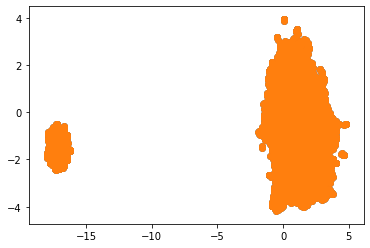

In [4]:


morph_analyzer =  pymorphy2.MorphAnalyzer()
polkrug_texts_vectorized = []
for text_idx, text in enumerate(polkrug_texts):
    text_vs = []
    for word in text.split():
        pos_tag = morph_analyzer.parse(word)[0].tag.POS
        pos_tagged_word = f"{word}_{pos_tag}"
        if word.isalpha() and pos_tagged_word in w2v_model:
            word_v = w2v_model.get_vector(pos_tagged_word)
            # print(f"found {pos_tagged_word}")
            text_vs.append(word_v)
    if text_vs:
        text_v = np.mean(np.array(text_vs), axis=0)
        polkrug_texts_vectorized.append((text, text_v))
    if text_idx % 100 == 0:
        print(f"processed {str(text_idx)} of {str(len(polkrug_texts))}")

print("calculated all the document vectors")

umap_emb = umap.UMAP()
X_2D_umap = umap_emb.fit_transform([e[1] for e in polkrug_texts_vectorized])

for i in range(2):
    plt.scatter(X_2D_umap[i:,0], X_2D_umap[i:,1])

In [21]:
for text, coords in zip([elem[0] for elem in polkrug_texts_vectorized], X_2D_umap):
    if coords[0] < -10:
        print(text, coords)

нет комментарий
 [-17.184225  -1.944451]
нет комментарий
 [-16.917423   -1.3823324]
нет комментарий
 [-17.208023  -0.538872]
нет комментарий
 [-16.675713   -1.9202087]
нет комментарий
 [-17.26449    -1.0560906]
нет комментарий
 [-16.60603    -1.8730552]
нет комментарий
 [-16.804514   -1.5253198]
нет комментарий
 [-17.902338   -1.1438357]
нет комментарий
 [-17.458656   -0.8251676]
нет комментарий
 [-16.606764   -1.6498878]
нет комментарий
 [-16.750072  -1.398927]
нет комментарий
 [-16.687338  -1.86891 ]
нет комментарий
 [-17.349606   -1.4202005]
нет комментарий
 [-17.51771    -1.2528194]
нет комментарий
 [-17.517729   -1.5084624]
нет комментарий
 [-16.885906   -1.9970268]
нет комментарий
 [-16.648663   -1.3875971]
нет комментарий
 [-16.485512   -1.9469277]
нет комментарий
 [-17.032822   -1.3818446]
нет комментарий
 [-17.178822   -1.9203974]
нет комментарий
 [-16.603436   -1.7186636]
нет комментарий
 [-17.954313   -1.9320952]
нет комментарий
 [-17.521149   -0.7143106]
нет комментарий
 [-